In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/brain-tumor'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-tumor/BTD-1/no/n20.jpg
/kaggle/input/brain-tumor/BTD-1/no/n1.jpg
/kaggle/input/brain-tumor/BTD-1/no/n79.jpg
/kaggle/input/brain-tumor/BTD-1/no/n15.jpg
/kaggle/input/brain-tumor/BTD-1/no/n27.jpg
/kaggle/input/brain-tumor/BTD-1/no/n18.jpg
/kaggle/input/brain-tumor/BTD-1/no/n26.jpg
/kaggle/input/brain-tumor/BTD-1/no/n58.jpg
/kaggle/input/brain-tumor/BTD-1/no/n31.jpg
/kaggle/input/brain-tumor/BTD-1/no/n90.jpg
/kaggle/input/brain-tumor/BTD-1/no/n5.jpg
/kaggle/input/brain-tumor/BTD-1/no/n94.jpg
/kaggle/input/brain-tumor/BTD-1/no/n66.jpg
/kaggle/input/brain-tumor/BTD-1/no/n74.jpg
/kaggle/input/brain-tumor/BTD-1/no/n97.jpg
/kaggle/input/brain-tumor/BTD-1/no/n57.jpg
/kaggle/input/brain-tumor/BTD-1/no/n25.jpg
/kaggle/input/brain-tumor/BTD-1/no/n22.jpg
/kaggle/input/brain-tumor/BTD-1/no/n54.jpg
/kaggle/input/brain-tumor/BTD-1/no/n95.jpg
/kaggle/input/brain-tumor/BTD-1/no/n38.jpg
/kaggle/input/brain-tumor/BTD-1/no/n49.jpg
/kaggle/input/brain-tumor/BTD-1/no/n56.jpg
/kaggle/input

In [2]:
import tensorflow as tf
from zipfile import ZipFile
import os,glob
import cv2
from tqdm.notebook import tqdm
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, Dropout, Dense,MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Convolution2D,Dense, Dropout
import tensorflow as tf
import keras
from keras.layers import Conv2D

In [3]:
#BTD_yes = os.listdir(/kaggle/input/btd2ds/BTD-2/yes/)
BTD_yes = ('/kaggle/input/brain-tumor/BTD-2/yes/')
BTD_no = ('/kaggle/input/brain-tumor/BTD-2/no/')


In [4]:

os.chdir(BTD_yes)
X = []
y = []
IMG_SIZE = 32
for i in tqdm(os.listdir('/kaggle/input/brain-tumor/BTD-2/yes/')):
      img = cv2.imread(i)   
      img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
      X.append(img)
      y.append("Y")
os.chdir(BTD_no)
for i in tqdm(os.listdir('/kaggle/input/brain-tumor/BTD-2/no/')):
      img = cv2.imread(i)   
      img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
      X.append(img)
      y.append('N')
#print(X)
print("===========")
print(y)

  0%|          | 0/232 [00:00<?, ?it/s]

  0%|          | 0/147 [00:00<?, ?it/s]

['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',

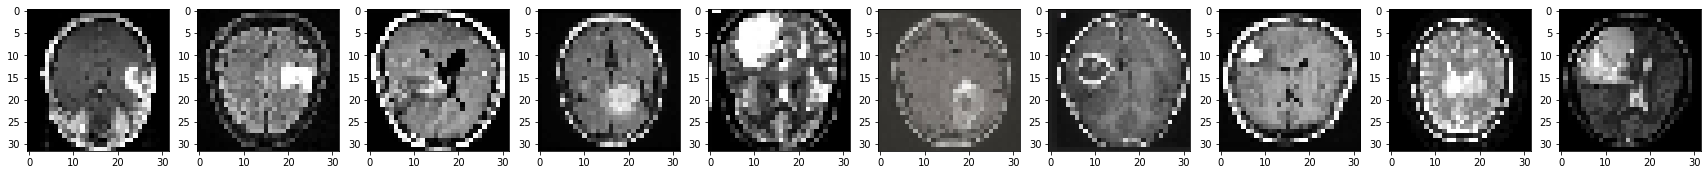

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(30,30))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X[i], cmap="gray")
    plt.axis('on')
plt.show()

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
import sklearn.model_selection as model_selection
#X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 0 )
#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75,test_size=0.25, random_state=101)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.80,test_size=0.20, random_state=101)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print("Shape of an image in X_train: ", X_train[0].shape)
print("Shape of an image in X_test: ", X_test[0].shape)


Shape of an image in X_train:  (32, 32, 3)
Shape of an image in X_test:  (32, 32, 3)


In [7]:
import tensorflow as tf
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)

y_train = np.array(y_train)
X_train = np.array(X_train)

y_test = np.array(y_test)
X_test = np.array(X_test)


In [8]:
print("X_train Shape: ", X_train.shape) 
print("X_test Shape: ", X_test.shape) 
print("y_train Shape: ", y_train.shape) 
print("y_test Shape: ", y_test.shape)

X_train Shape:  (303, 32, 32, 3)
X_test Shape:  (76, 32, 32, 3)
y_train Shape:  (303, 2)
y_test Shape:  (76, 2)


In [9]:
m1=Sequential()
m1.add(BatchNormalization(input_shape = (IMG_SIZE,IMG_SIZE,3)))
m1.add(Conv2D(32, (3,3),strides=(1,1), activation ='relu', input_shape = (IMG_SIZE, IMG_SIZE, 3))) 
m1.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

m1.add(BatchNormalization())

m1.add(Conv2D(64, (4,4),strides=(1,1), padding='same', activation='relu'))
m1.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

m1.add(BatchNormalization())

m1.add(Conv2D(128, (3,3),strides=(1,1), padding='same', activation='relu'))
m1.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

m1.add(BatchNormalization())

m1.add(Conv2D(128, (2,2),strides=(1,1), padding='same', activation='relu'))
m1.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

m1.add(BatchNormalization())


m1.add(Dropout(0.25))
m1.add(Flatten()) 


m1.add(Dense(units=128,activation = 'relu'))
m1.add(Dense(units = 64, activation = 'relu'))
m1.add(Dense(units = 32, activation = 'relu'))

m1.add(Dense(units = 2, activation = 'softmax'))
m1.compile(optimizer='adam', loss = 'categorical_crossentropy',metrics = ['acc'])


m1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 32, 32, 3)         12        
_________________________________________________________________
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 15, 15, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 15, 15, 64)        32832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 7, 7, 64)          2

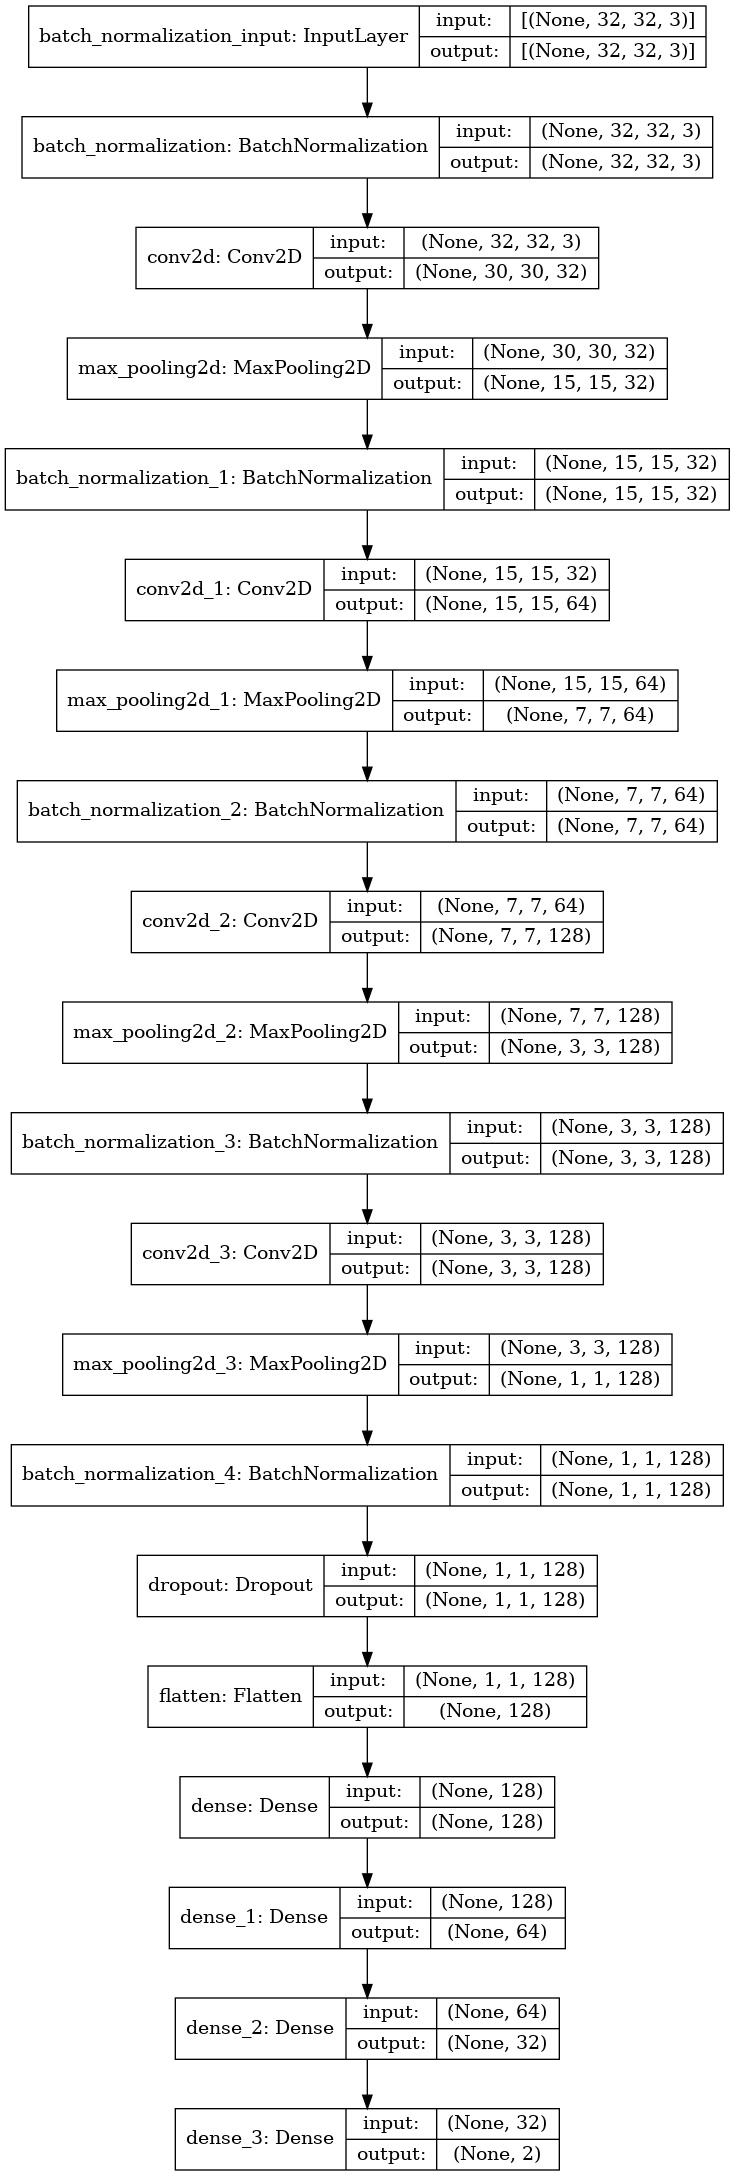

In [10]:
dot_img_file = '/tmp/model_1.png'
tf.keras.utils.plot_model(m1, to_file=dot_img_file, show_shapes=True)

In [11]:
history = m1.fit(X_train, y_train, batch_size=32, epochs=150, verbose=1, validation_data=(X_test, y_test))

Epoch 1/150
10/10 [==============================] - 2s 90ms/step - loss: 0.6171 - acc: 0.6733 - val_loss: 0.6819 - val_acc: 0.5658
Epoch 2/150
10/10 [==============================] - 0s 49ms/step - loss: 0.3513 - acc: 0.8581 - val_loss: 0.9845 - val_acc: 0.5658
Epoch 3/150
10/10 [==============================] - 0s 49ms/step - loss: 0.2177 - acc: 0.9241 - val_loss: 1.0248 - val_acc: 0.5658
Epoch 4/150
10/10 [==============================] - 0s 50ms/step - loss: 0.1298 - acc: 0.9538 - val_loss: 1.0587 - val_acc: 0.6184
Epoch 5/150
10/10 [==============================] - 1s 52ms/step - loss: 0.0988 - acc: 0.9505 - val_loss: 0.9352 - val_acc: 0.6711
Epoch 6/150
10/10 [==============================] - 1s 49ms/step - loss: 0.0521 - acc: 0.9835 - val_loss: 0.8364 - val_acc: 0.6974
Epoch 7/150
10/10 [==============================] - 0s 47ms/step - loss: 0.0429 - acc: 0.9967 - val_loss: 0.5473 - val_acc: 0.7632
Epoch 8/150
10/10 [==============================] - 0s 50ms/step - loss: 0.

<Figure size 432x288 with 0 Axes>

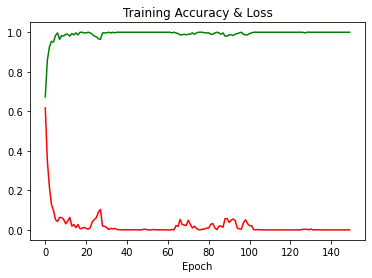

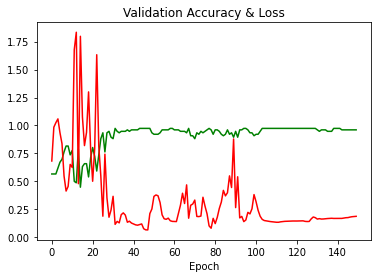

<Figure size 432x288 with 0 Axes>

In [12]:
from matplotlib import pyplot as plt
plt.plot(history.history['acc'],'green',label='acc')
plt.plot(history.history['loss'],'red',label='Loss')
plt.title('Training Accuracy & Loss')
plt.xlabel('Epoch')
plt.figure()
plt.plot(history.history['val_acc'],'green',label='acc')
plt.plot(history.history['val_loss'],'red',label='Loss')
plt.title('Validation Accuracy & Loss')
plt.xlabel('Epoch')
plt.figure()

3/3 [==============================] - 0s 11ms/step - loss: 0.1869 - acc: 0.9605


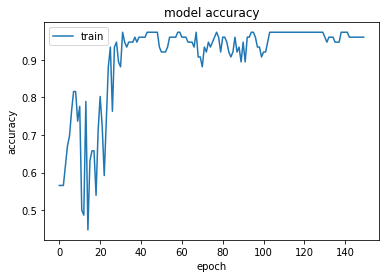

In [13]:
m1.evaluate(X_test,y_test)
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

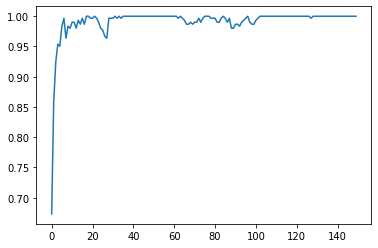

In [14]:
plt.plot(history.history['acc'])

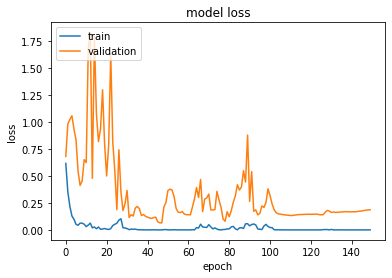

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

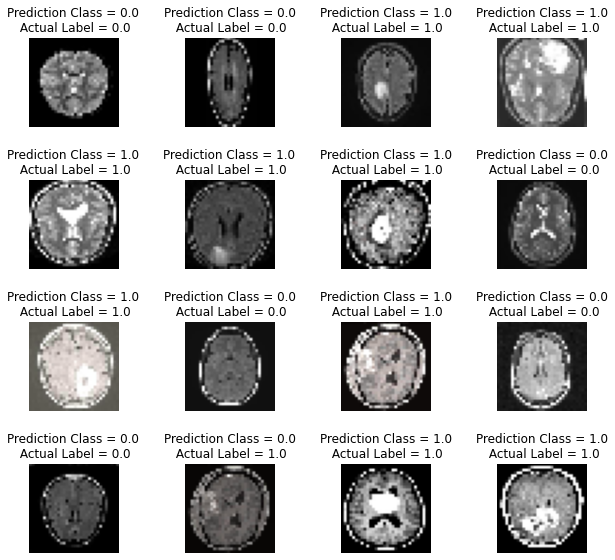

In [16]:
y_pred=np.argmax(m1.predict(X_test), axis=-1)
y_act=np.argmax(y_test,axis=1)
L = 4
W = 4
fig, axes = plt.subplots(L, W, figsize = (10,10))
axes = axes.ravel()
for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i])
    axes[i].set_title(f"Prediction Class = {y_pred[i]:0.1f}\n Actual Label = {y_act[i]:0.1f}")
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.75)